# Boosting Trees
Boosting is an ensemble technique in which the predictors are not made independently, but sequentially.<br>
Below we can see the algorithm for the L2 boosting<br>
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)


In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class L2_Boost(BaseEstimator, ClassifierMixin):

    def __init__(self, n_trees, learning_rate):
        self.trees = []
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.f0 = None
        self.mses = []
        
    def predict(self, X):
        y_hat = np.ones(X.shape[0]) * self.f0
        for tree in self.trees:
            y_hat = y_hat + self.learning_rate * tree.predict(X)
        return y_hat

    def fit(self, X, y):
        self.f0 = y.mean()
        y_hat = np.ones(len(y)) * self.f0
        for i in range(self.n_trees):
            residuals = y - y_hat
            regressor = DecisionTreeRegressor(max_depth=1)
            regressor.fit(X, residuals)
            self.trees.append(regressor)
            predictions = regressor.predict(X)
            y_hat = y_hat + self.learning_rate*predictions
            self.mses.append(mean_squared_error(y, y_hat))
            
    def score(y, y_pred):
        return m
    
    def get_params(self, deep=True):
        return {
                'n_trees': self.n_trees,
                'learning_rate': self.learning_rate,
               }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)

In [3]:
X, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
regressor = L2_Boost(n_trees=1000, learning_rate=0.1)
regressor.fit(x_train, y_train)

In [5]:
y_pred = regressor.predict(x_test)
mean_squared_error(y_test, y_pred)

24.53425814668037

In [6]:
regressor.get_params()

{'n_trees': 1000, 'learning_rate': 0.1}

Text(0.5, 1.0, 'Error as a function of number of trees')

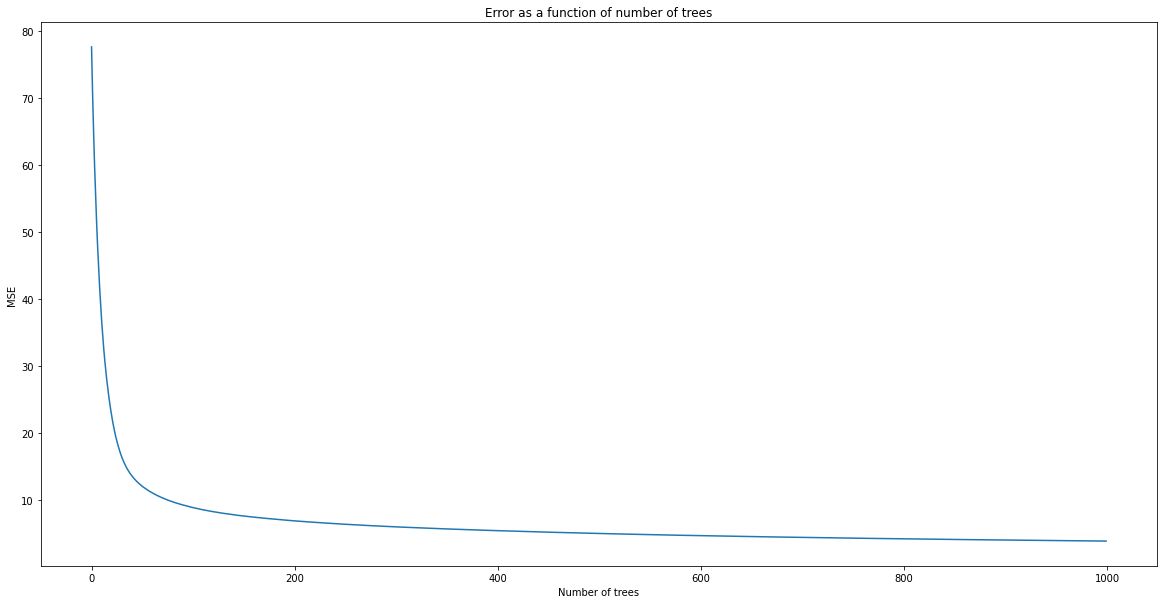

In [7]:
plt.figure(figsize=(20,10))
plt.plot(regressor.mses)
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.title("Error as a function of number of trees")